# 3 线性神经网络

## 3.1 线性回归

[回归（regression）](2.ipynb)是能为一个或多个自变量与因变量之间关系建模的一类方法。

#### 线性回归的基本元素

- 线性模型：
    - 线性假设指目标可以表示为特征的加权和。$$\hat{y}=\textbf{w}^T\textbf{x}+b$$ $$\hat{\textbf{y}}=\textbf{Xw}+b$$ 
    **权重（weight）** 决定了每个特征对预测值的影响， **偏置（bias）** 指当所有特征都取值为0时，预测值应该为多少。
    - 线性模型本质即是权重 **w** 和偏置b确定的仿射变换。后面的softmax回归也是一个线性模型。



- 损失函数：
    - 回归函数中最常用的损失函数是平方误差函数，当样本 $i$ 的预测值为 $\hat{y}^{i}$ ，其相应的真实标签为 $y^{i}$ 时，平方误差定义为： $$l^{(i)}(\textbf{w},b)=\frac{1}{2}(\hat{y}^{(i)}-y^{(i)})^2$$ $$L(\textbf{w},b)=\frac{1}{n}\sum_{i=1}^n l^{(i)}(\textbf{w},b)=\frac{1}{n}\sum_{i=1}^n \frac{1}{2}(\textbf{w}^T\textbf{x}^{(i)}+b-y^{(i)})^2$$
    - 平方误差损失函数可以用于线性回归的一个原因是：我们假设了观测中包含噪声，其中噪声服从正态分布。这一部分参照《概率统计》课程的极大似然估计。



- 解析解：
    - 参照课程《面向人工智能的线性代数》中关于“最小二乘法”的描述，对于矛盾方程组 $A_{m \times n}x = b$ ，其最小二乘解 $\hat{x}$ 为对应正规化方程组 $A^T Ax=A^T b$ 的解。
    - 对于最小化损失函数即最小化 $||\textbf{y}-\textbf{Xw}||^2$ （此时已将偏置b合并到参数w中），若 $X$ 列满秩，则存在解析解：$$\textbf{w}^* = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T y$$

#### 随机梯度下降

参照课程《线性优化与凸优化》，对于需最小化的所选函数（在线性回归中是损失函数），在其负梯度方向上迭代地更新参数

1. 损失函数为 $$L(\textbf{w},b)=\frac{1}{n}\sum_{i=1}^n l^{(i)}(\textbf{w},b)=\frac{1}{n}\sum_{i=1}^n \frac{1}{2}(\textbf{w}^T\textbf{x}^{(i)}+b-y^{(i)})^2$$ 
2. 若按照整个数据集进行遍历速度缓慢，故在每次需要计算更新的时候只要随机抽取一小批样本，这种方法称为 **小批量随机梯度下降（minibatch stochastic gradient descent）** ：$$\mathcal{B}: \mathcal{B} \subseteq \{l^{(i)}|i=1,...,n\} $$
3. 对于小批量 $\mathcal{B}$ ，它的损失函数为： $$L_{\mathcal{B}}(\textbf{w},b)=\frac{1}{|\mathcal{B}|}\sum_{i \in \mathcal{B}}l^{(i)}(\textbf{w},b)$$
4. 损失函数对模型参数 $(\textbf{w},b)$ 求导：$$\nabla L_{\mathcal{B}}(\textbf{w},b) = \frac{1}{|\mathcal{B}|}\sum_{i\in \mathcal{B}}\partial_{(\textbf{w},b)}l^{(i)}(\textbf{w},b)$$
5. 设置步长为正数 $\eta$ ，则可以更新参数为 $$(\textbf{w},b) \leftarrow (\textbf{w},b)-\frac{\eta}{|\mathcal{B}|}\sum_{i\in \mathcal{B}}\partial_{(\textbf{w},b)}l^{(i)}(\textbf{w},b) $$

在其中：
- $|\mathcal{B}|$ 表示每个小批量的样本数，称为 **批量大小（batch size）**。
- $\eta$ 步长表示 **学习率（learning rate）**。
这些可以调整，但是不在训练过程中更新，而是手动预先指定的参数称为 **超参数（hyperparameter）** ， **调参（hyperparameter tuning）** 是选择超参数的过程。
- 超参数的调整是根据迭代结果来调整的，训练迭代结果是在独立的验证数据集上评估得到的。
- 找到一组能够在新增数据上实现较低的损失的参数称为 **泛化（generalization）**。

#### 矢量化加速

**矢量化加速** 是一种通过将操作应用于整个数组或数据集而不是逐个元素处理来大幅提升计算效率的技术。Numpy，Pandas，PyTorch等自动使用矢量化。

#### 神经网络

线性回归模型可看做一个单层神经网络：

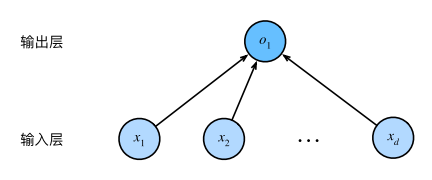

## 3.2 线性回归的实现

In [1]:
import random
import torch
from d2l import torch as d2l

- 数据集生成函数 ``synthetic_data(w, b, num_examples)``：
    - ``(w, b, num_examples)`` 是数据集准备好的权重、偏置和样本数量。
    - ``torch.normal(mean, std, size)`` 生成服从正态分布的均质mean、标准差std、形状size的张量。
    - ``torch.matmul(input, other)`` 执行矩阵乘法。
    - 最后一行的 ``torch.normal(0, 0.01, y.shape)`` 用于添加高斯噪声。

In [2]:
def synthetic_data(w, b, num_examples): #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

- 小批量生成函数 ``data_iter(batch_size, features, labels)``：
    - ``(batch_size, features, labels)`` 指定了生成小批量的大小，而后两个参数接收特征矩阵、标签向量作为输入。
    - ``len(features)`` 获取样本总数。
    - `indices = list(range(num_examples))` 生成索引列表，而 `random.shuffle(indices)` 对索引列表进行随机打乱。
    - ``for i in range(0, num_examples, batch_size)`` 循环遍历所有样本，但是每次只返回一个批次的数据。这是 ``yield`` 的惰性返回特性，它会暂停函数，保留局部变量和执行位置，返回当前值。

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

- 初始化模型参数：
    - `torch.normal()` 使用正态分布采样随机数来初始化权重
    - `requires_grad` 参数启用自动微分，参照 [第二章](2.ipynb)

In [6]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

- 定义模型：

In [7]:
def linreg(X, w, b): #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

- 定义损失函数：

In [8]:
def squared_loss(y_hat, y): #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

- 定义优化算法 `sgd(params, lr, batch_size)` ：
    - `(params, lr, batch_size)` 中 `lr` 是学习率， `params` 是所有需要更新的参数的列表。
    - `with torch.no_grad():` 因为我们需要更新参数，所以需要临时禁用梯度跟踪，保证求取梯度时针对的仅是新的参数
    - `param.grad.zero_()` 重置梯度，因为 **PyTorch 会累积梯度**


In [4]:
def sgd(params, lr, batch_size): #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

- 训练：
    - `.backward()` 的具体行为：从 `l.sum()` 出发，沿着计算图（由 `requires_grad=True` 的张量构建） 反向回溯所有参与计算的张量（如 w 和 b）。计算出的梯度会存储在参数的 `.grad` 属性中（如 `w.grad` 和 `b.grad`）。

In [9]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 10

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size) # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.029822
epoch 2, loss 0.000103
epoch 3, loss 0.000050


- 训练结果评估：

In [10]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-9.5129e-05,  3.8147e-06], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0004], grad_fn=<RsubBackward1>)


## 3.3 softmax回归

#### 分类问题与独热编码

在[第一章](1.ipynb)中介绍到，回归用来预测连续数值的问题，而分类用来预测离散数值的问题。

样本的“硬性”类别指其实际意义上所属的唯一类别，样本的“软性”类别指的是属于每个类别的概率。软类别的模型可以兼容解决硬类别的实际问题。

若分类问题的类别间有一些自然顺序，那么这个问题可以转变为回归问题。然而，一般的分类问题并不与类别之间的自然顺序有关，使用[第二章](2.ipynb)介绍到的 **独热编码（one‐hot encoding）** 可以表示每个类别：
- 独热编码是一个向量，分量个数等于类别数
- 类别对应的分量设置为1，其他所有分量设置为0



#### 分类问题的网络架构

为了估计所有可能类别的条件概率，我们需要一个有多个输出的模型，每个类别对应一个输出：

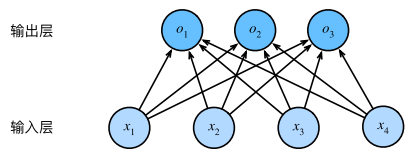

称每个输出取决于所有输入的层为全连接层。

每个输出形成向量 $\textbf{o}=(o_1,o_2,...,o_n)$ ，每个输出对应于它自己的仿射函数，向量形式表达后为： $$\textbf{o}=\textbf{Wx+b}$$ 

#### softmax运算

将为规范化的预测 $\textbf{o}$ 视为所求的软类别存在以下问题：
- 输出概率 $o_i(i=1,...,n)$ 的总和不一定为1，且部分值可能为负，违反概率公理。
- 对于分类器输出为 $o_i=p$ 的所有样本，样本中不一定有接近 $p$ 的部分实际上属于 $i$ 的类别。

***softmax*** 函数能够将未规范化的预测变换为非负数并且总和为1，同时让模型保持可导的性质。它首先对每个未规范化的预测求幂，再让每个求幂后的结果除以它们的总和。

$$\textbf{O}=\textbf{XW+b}$$
$$\hat{\textbf{Y}}=\text{softmax}(\textbf{O})$$

#### 损失函数

参考《概率统计》课程关于最大似然估计的描述，对于任何标签 $\textbf{y}$ 和模型预测 $\hat{\textbf{y}}$ ，损失函数为： $$l(\textbf{y},\hat{\textbf{y}})=-\sum_{j=1}^q y_j \log \hat{y}_j$$

参考《信息论》课程，这个损失函数通常被称为 **交叉熵损失（cross-entropy loss）**。

## 3.4 softmax回归的实现